In [3]:
# importing necessary packages :>

import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# importing data

data = pd.read_csv("Data/BGO/GAMMA_Charge_Histo(Time 90)_06-09-23 Time 1425.csv", 
                   names = ['ADC channel','counts'], 
                   nrows = 2500
                  )

Text(0.5, 1.0, 'Counts Recorded per Channel')

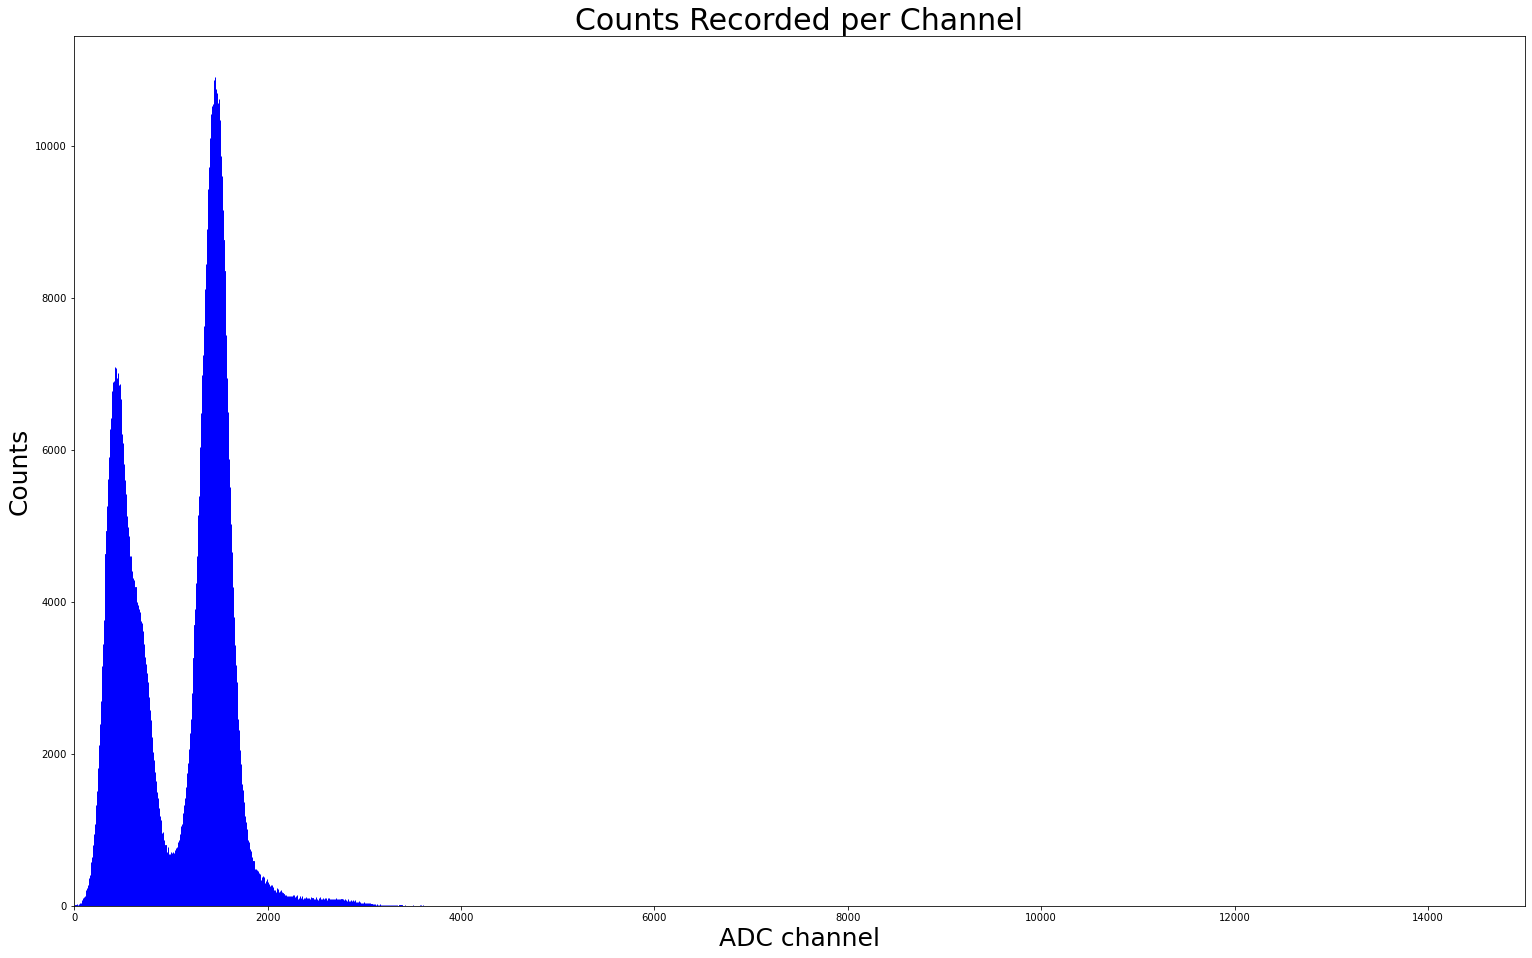

In [11]:
# creating graph
fig, ax = plt.subplots(figsize = (26,16))

# barplotting
ax.bar(x = data['ADC channel'], height = data['counts'], width = 0.8, color = 'pink', ec = 'blue')
ax.set_xlim(xmin=0, xmax = 15000)

# labeling
plt.xlabel('ADC channel', fontsize = 25)
plt.ylabel('Counts', fontsize = 25)
plt.title('Counts Recorded per Channel', fontsize = 30)